In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set file path
file_path = "owid-co2-data.csv"
fossil_df = pd.read_csv(file_path, low_memory=False)
# note: total rows 25,989 and 60 columns
fossil_df.head(2)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN


In [3]:
# df columns
fossil_df.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'trade_co2',
       'cement_co2', 'cement_co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_industry_co2', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_gdp', 'co2_per_unit_energy',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share',
       'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [4]:
# create df for co2 by type
emission = fossil_df[["country", "year", "co2", "trade_co2", "cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2", "population"]]
emission = emission[emission["year"] >= 1990]
emission

,country,year,co2,trade_co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,population
41,Afghanistan,1990,2.603,NaN,0.046,0.278,0.026,0.403,1.850,NaN,12412311.0
42,Afghanistan,1991,2.427,NaN,0.046,0.249,0.026,0.388,1.718,NaN,13299016.0
43,Afghanistan,1992,1.379,NaN,0.046,0.022,0.022,0.363,0.927,NaN,14485543.0
44,Afghanistan,1993,1.333,NaN,0.047,0.018,0.022,0.352,0.894,NaN,15816601.0
45,Afghanistan,1994,1.282,NaN,0.047,0.015,0.022,0.338,0.860,NaN,17075728.0
...,...,...,...,...,...,...,...,...,...,...,...
25984,Zimbabwe,2016,10.738,1.415,0.639,6.959,NaN,NaN,3.139,NaN,14030338.0
25985,Zimbabwe,2017,9.582,1.666,0.678,5.665,NaN,NaN,3.239,NaN,14236599.0
25986,Zimbabwe,2018,11.854,1.308,0.697,7.101,NaN,NaN,4.056,NaN,14438812.0
25987,Zimbabwe,2019,10.949,1.473,0.697,6.020,NaN,NaN,4.232,NaN,14645473.0


In [5]:
# determine countries in dataset
emission["country"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'EU-27', 'Ecuador',
       'Egypt', 'El Salvador', 'Equa

In [7]:
# create df for world co2
emission_df = emission[emission["country"] == "World"]
#emission_df = emission_df.drop(["trade_co2", "other_industry_co2"], axis=1)
#emission_df = emission_df.groupby("year").sum()
#emission_df = emission_df.reset_index()
emission_df

,country,year,co2,trade_co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,population
25698,World,1990,22749.574,0.0,499.175,8714.693,253.079,3841.498,9218.259,222.871,5.327529e+09
25699,World,1991,23238.102,-0.0,512.582,8632.497,267.727,3919.079,9690.864,215.353,5.414289e+09
25700,World,1992,22569.624,-0.0,534.352,8432.360,237.271,3962.803,9187.135,215.703,5.498920e+09
25701,World,1993,22803.495,0.0,555.907,8530.223,233.520,4070.111,9198.668,215.066,5.581598e+09
25702,World,1994,22964.583,0.0,592.506,8578.204,237.025,4106.646,9234.925,215.276,5.663150e+09
25703,World,1995,23453.944,0.0,626.551,8823.056,235.064,4215.056,9331.868,222.349,5.744213e+09
25704,World,1996,24154.961,-0.0,639.058,9048.363,237.259,4401.812,9607.797,220.672,5.824892e+09
25705,World,1997,24300.550,-0.0,658.857,8999.358,242.863,4417.083,9760.159,222.230,5.905046e+09
25706,World,1998,24206.271,-0.0,654.332,8761.669,231.477,4489.340,9850.362,219.093,5.984794e+09
25707,World,1999,24518.962,0.0,685.077,8694.800,223.914,4622.641,10074.987,217.544,6.064239e+09


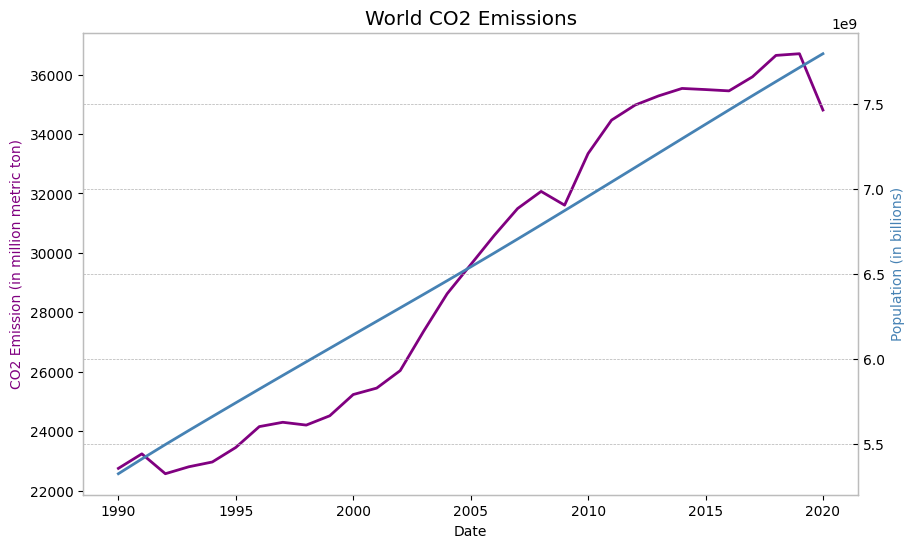

In [8]:
# graph co2 and population
fig, ax=plt.subplots(figsize=(10,6))
plt.style.use('bmh')
ax.plot(emission_df.year,emission_df.co2,color='purple')
ax.set_title("World CO2 Emissions")
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('CO2 Emission (in million metric ton)',color='purple',fontsize=10)
ax2=ax.twinx()
ax2.plot(emission_df.year,emission_df.population,color='steelblue')
ax2.set_ylabel('Population (in billions)',color='steelblue',fontsize=10)
plt.show()

In [9]:
# create df for co2 by region
region_df = emission[(emission["country"] == "Africa") |
                      (emission["country"] == "Asia") |
                      (emission["country"] == "Europe") |
                      (emission["country"] == "North America") |
                      (emission["country"] == "South America")]
#emission_df = emission_df.drop(["trade_co2", "other_industry_co2"], axis=1)
region_df = region_df.groupby("country").sum()
region_df = region_df.reset_index()
region_df

,country,year,co2,trade_co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,population
0,Africa,62155,32339.202,-8892.489,1463.293,12246.039,1493.496,5349.927,11786.448,0.000,2.921198e+10
1,Asia,62155,409376.842,-29180.338,23009.919,215738.288,2911.793,50827.250,112496.757,4392.830,1.228850e+11
2,Europe,62155,192932.564,7870.008,3761.642,60986.287,1874.451,56535.742,67665.812,2108.631,2.274709e+10
3,North America,62155,207152.063,6778.499,2086.781,61905.274,2134.649,49763.620,90334.475,927.265,1.588875e+10
4,South America,62155,28440.950,337.862,1080.302,2759.681,1118.921,6199.991,17118.807,163.245,1.141943e+10


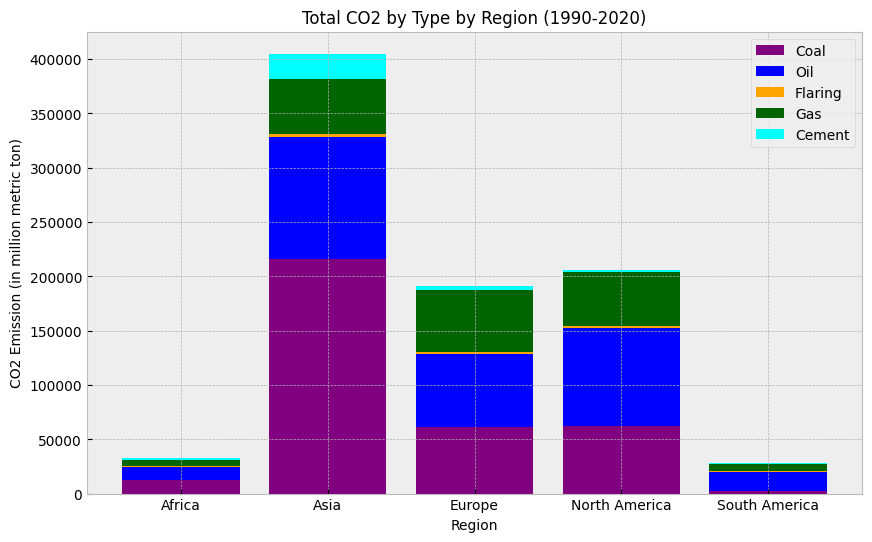

In [45]:
# graph co2 by region
plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(10,6))

ax.bar(region_df.country,region_df.coal_co2,color='purple', label='Coal')
ax.bar(region_df.country,region_df.oil_co2,bottom=region_df.coal_co2,color='blue', label='Oil')
ax.bar(region_df.country,region_df.flaring_co2,bottom=region_df.coal_co2+region_df.oil_co2,color='orange', label='Flaring')
ax.bar(region_df.country,region_df.gas_co2,bottom=region_df.coal_co2+region_df.oil_co2+region_df.flaring_co2,color='darkgreen', label='Gas')
ax.bar(region_df.country,region_df.cement_co2,bottom=region_df.coal_co2+region_df.oil_co2+region_df.flaring_co2+region_df.gas_co2,color='cyan', label='Cement')

ax.set_title('Total CO2 by Type by Region (1990-2020)', fontsize=12)
ax.set_xlabel('Region',fontsize=10)
ax.set_ylabel('CO2 Emission (in million metric ton)',color='k',fontsize=10)
ax.legend()
plt.show()

In [11]:
# create df for top 10 countries
country_df = emission[(emission["country"] != "Africa") &
                      (emission["country"] != "Asia") &
                      (emission["country"] != "Asia (excl. China & India)") &
                      (emission["country"] != "Europe") &
                      (emission["country"] != "EU-27") &
                      (emission["country"] != "Europe (excl. EU-27)") &
                      (emission["country"] != "Europe (excl. EU-28)") &
                      (emission["country"] != "European Union (27)") &
                      (emission["country"] != "European Union (28)") &
                      (emission["country"] != "High-income countries") &
                      (emission["country"] != "International transport") &
                      (emission["country"] != "Kuwaiti Oil Fires") &
                      (emission["country"] != "Low_income countries") &
                      (emission["country"] != "Lower-middle-income countries") &
                      (emission["country"] != "North America") &
                      (emission["country"] != "North America (excl. USA)") &
                      (emission["country"] != "South America") &
                      (emission["country"] != "Upper-middle-income countries") &
                      (emission["country"] != "World")]
country_df = country_df.groupby("country").sum()
country_df = country_df.reset_index()
country_df = country_df.sort_values(by="co2", ascending=False)[0:10]
country_df = country_df.drop(columns=["co2"])
country_df

,country,year,trade_co2,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,population
41,China,62155,-24634.291,13963.620,144402.614,0.000,5669.713,27368.349,3640.336,4.106224e+10
220,United States,62155,6969.906,1203.115,57598.901,1427.101,40149.633,71419.989,841.392,9.109139e+09
171,Russia,62155,-10737.827,657.597,13778.622,864.435,23228.621,12416.960,540.574,4.515331e+09
93,India,62155,-2924.989,2177.637,27593.887,88.870,2242.753,11875.016,0.000,3.533154e+10
101,Japan,62155,6434.436,996.674,12350.019,13.927,5915.556,18400.821,292.395,3.948341e+09
78,Germany,62155,4516.481,429.470,11429.813,88.797,5067.751,9592.747,287.443,2.522738e+09
36,Canada,62155,248.996,201.935,3055.902,468.457,5470.860,7585.547,85.871,1.006357e+09
219,United Kingdom,62155,4002.862,166.777,4296.409,179.727,5340.380,5967.179,108.012,1.907020e+09
193,South Korea,62155,1631.077,770.561,6742.636,0.117,1939.097,5811.625,202.592,1.492073e+09
95,Iran,62155,-895.668,433.151,143.701,1012.978,6527.615,6298.580,0.000,2.167239e+09


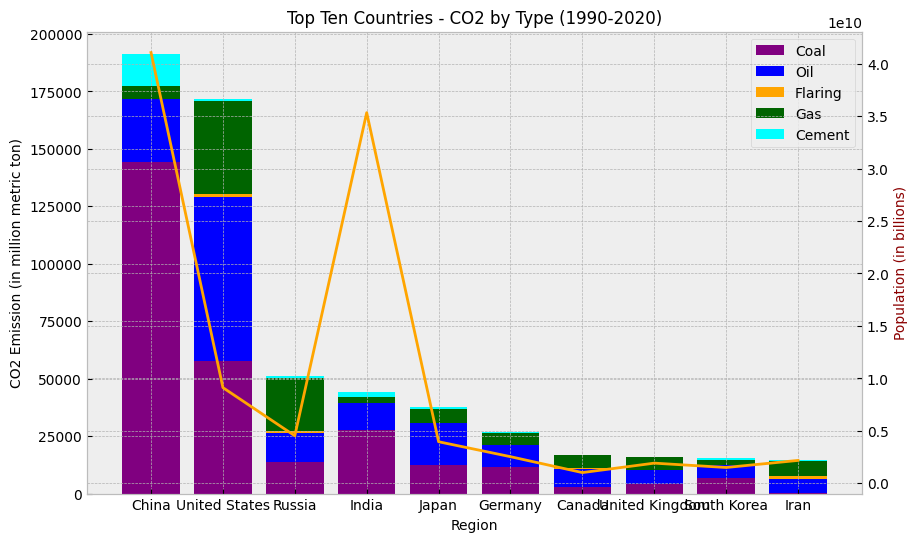

In [46]:
# graph top 10 countries - CO2 
plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(10,6))

ax.bar(country_df.country,country_df.coal_co2,color='purple', label='Coal')
ax.bar(country_df.country,country_df.oil_co2,bottom=country_df.coal_co2,color='blue', label='Oil')
ax.bar(country_df.country,country_df.flaring_co2,bottom=country_df.coal_co2+country_df.oil_co2,color='orange', label='Flaring')
ax.bar(country_df.country,country_df.gas_co2,bottom=country_df.coal_co2+country_df.oil_co2+country_df.flaring_co2,color='darkgreen', label='Gas')
ax.bar(country_df.country,country_df.cement_co2,bottom=country_df.coal_co2+country_df.oil_co2+country_df.flaring_co2+country_df.gas_co2,color='cyan', label='Cement')

ax2=ax.twinx()
ax2.plot(country_df.country,country_df.population,color='orange')
ax2.set_ylabel('Population (in billions)',color='darkred',fontsize=10)
plt.xticks(rotation=45, ha='right')

ax.set_title('Top Ten Countries - CO2 by Type (1990-2020)', fontsize=12)
ax.set_xlabel('Region',fontsize=10)
ax.set_ylabel('CO2 Emission (in million metric ton)',color='k',fontsize=10)
#plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

In [16]:
# create df of co2 per capita
emission2 = fossil_df[["country", "year", "co2_per_capita", "cement_co2_per_capita", "coal_co2_per_capita", "flaring_co2_per_capita", "gas_co2_per_capita", "oil_co2_per_capita", "other_co2_per_capita", "population"]]
emission2 = emission2[emission2["year"] >= 1990]
emission2

,country,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,population
41,Afghanistan,1990,0.210,0.004,0.022,0.002,0.032,0.149,NaN,12412311.0
42,Afghanistan,1991,0.182,0.003,0.019,0.002,0.029,0.129,NaN,13299016.0
43,Afghanistan,1992,0.095,0.003,0.002,0.002,0.025,0.064,NaN,14485543.0
44,Afghanistan,1993,0.084,0.003,0.001,0.001,0.022,0.056,NaN,15816601.0
45,Afghanistan,1994,0.075,0.003,0.001,0.001,0.020,0.050,NaN,17075728.0
...,...,...,...,...,...,...,...,...,...,...
25984,Zimbabwe,2016,0.765,0.046,0.496,NaN,NaN,0.224,NaN,14030338.0
25985,Zimbabwe,2017,0.673,0.048,0.398,NaN,NaN,0.228,NaN,14236599.0
25986,Zimbabwe,2018,0.821,0.048,0.492,NaN,NaN,0.281,NaN,14438812.0
25987,Zimbabwe,2019,0.748,0.048,0.411,NaN,NaN,0.289,NaN,14645473.0


In [40]:
# create df for top 10 countries - co2 per capita
per_capita_df = emission2[(emission2["year"] == 2020)]
per_capita_df = per_capita_df.sort_values(by="co2_per_capita", ascending=False)[0:10]
per_capita_df

,country,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,population
19172,Qatar,2020,37.019,0.800,NaN,0.401,31.295,4.523,NaN,2881060.0
16343,New Caledonia,2020,30.448,0.115,20.212,NaN,NaN,10.121,NaN,285491.0
15463,Mongolia,2020,26.978,0.126,25.504,NaN,NaN,1.348,NaN,3278292.0
23331,Trinidad and Tobago,2020,25.373,0.180,NaN,NaN,22.248,2.945,NaN,1399491.0
3633,Brunei,2020,23.220,NaN,NaN,1.516,17.209,4.495,NaN,437483.0
12817,Kuwait,2020,20.825,0.368,NaN,0.405,9.706,10.347,NaN,4270563.0
2159,Bahrain,2020,20.546,0.308,NaN,NaN,18.118,2.119,NaN,1701583.0
5495,Curacao,2020,20.323,NaN,NaN,NaN,0.710,19.614,NaN,164100.0
20269,Saudi Arabia,2020,17.967,0.735,NaN,0.003,7.388,9.841,NaN,34813867.0
12598,Kazakhstan,2020,15.516,0.202,9.141,0.779,2.564,2.671,0.159,18776707.0


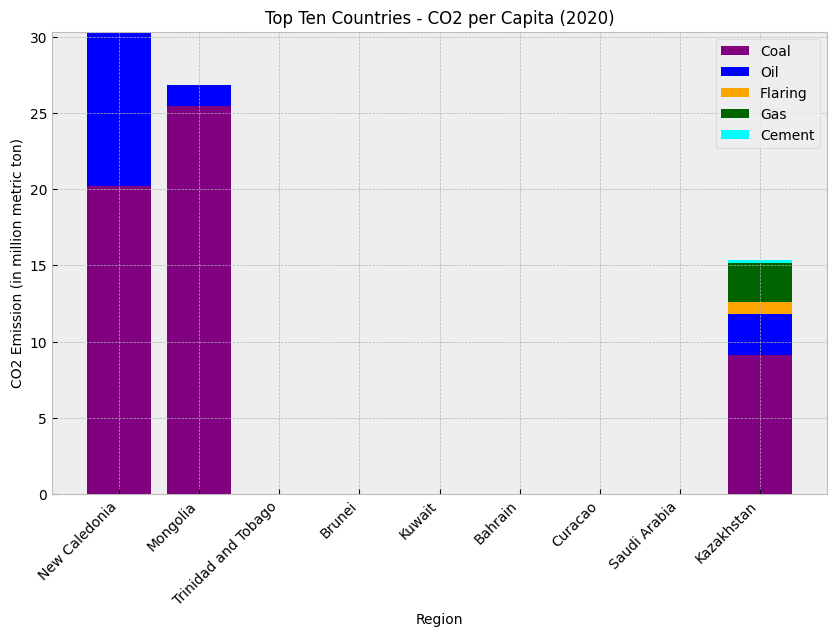

In [42]:
# graph top 10 countries co2 per capita
plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(10,6))

ax.bar(per_capita_df.country,per_capita_df.coal_co2_per_capita,color='purple',label='Coal')

ax.bar(per_capita_df.country,per_capita_df.oil_co2_per_capita,\
       bottom=per_capita_df.coal_co2_per_capita,color='blue', label='Oil')

ax.bar(per_capita_df.country,per_capita_df.flaring_co2_per_capita,\
       bottom=per_capita_df.coal_co2_per_capita+per_capita_df.oil_co2_per_capita,\
       color='orange', label='Flaring')

ax.bar(per_capita_df.country,per_capita_df.gas_co2_per_capita,\
       bottom=per_capita_df.coal_co2_per_capita+per_capita_df.oil_co2_per_capita+per_capita_df.flaring_co2_per_capita,\
       color='darkgreen', label='Gas')

ax.bar(per_capita_df.country,per_capita_df.cement_co2_per_capita,\
       bottom=per_capita_df.coal_co2_per_capita+per_capita_df.oil_co2_per_capita+per_capita_df.flaring_co2_per_capita+per_capita_df.gas_co2_per_capita,\
       color='cyan', label='Cement')

ax.set_title('Top Ten Countries - CO2 per Capita (2020)', fontsize=12)
ax.set_xlabel('Region',fontsize=10)
ax.set_ylabel('CO2 Emission (in million metric ton)',color='k',fontsize=10)
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()